# **Introduction**

This analysis was conducted using the Pima Indians Diabetes Database, a well-known dataset available on Kaggle.com. The dataset consists of medical data collected from women of Pima Indian heritage, who have a high prevalence of diabetes. The aim of this project is to develop a machine learning model to predict whether a person is likely to develop diabetes based on various health metrics, such as glucose levels, blood pressure, and BMI.

The motivation for this analysis is to explore how medical data can be used to identify individuals at risk for diabetes, potentially enabling earlier interventions and better management of the disease. 

# **Importing Libraries**

In [98]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np


# **Load Dataset**

In [99]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df.shape

(768, 9)

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Exploratory Analysis**

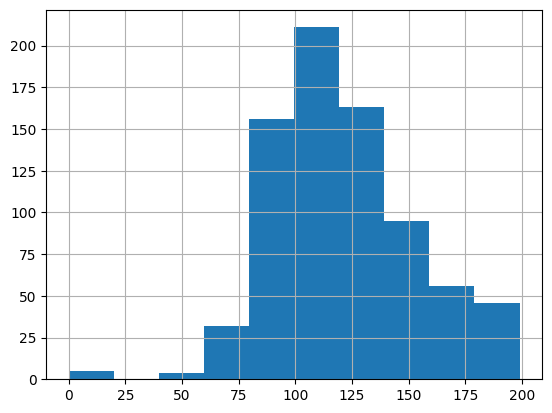

In [104]:


df['Glucose'].hist()
plt.show()

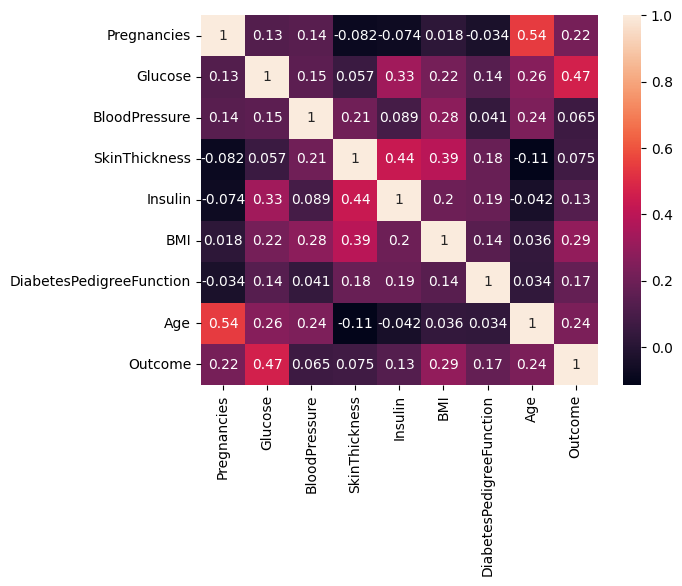

In [105]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)
plt.show()

# **Glucose Levels**

In [106]:
diabetic_people = df[df['Outcome'] == 1]
diabetic_people_glucose_mean = round(diabetic_people['Glucose'].mean(), 1)

non_diabetic_people = df[df['Outcome'] == 0]
non_diabetic_people_glucose_mean = round(non_diabetic_people['Glucose'].mean(), 1)


print(f'Average glucose levels in diabetic people: {diabetic_people_glucose_mean}')

print(f'Average glucose levels in non diabetic people: {non_diabetic_people_glucose_mean}')

Average glucose levels in diabetic people: 141.3
Average glucose levels in non diabetic people: 110.0


# **BMI Levels**

In [107]:
diabetic_BMI_levels_median = round(diabetic_people['BMI'].median(), 1)

non_diabetic_BMI_levels_median = round(non_diabetic_people['BMI'].median(), 1)

print(f'BMI median levels in diabetic people: {diabetic_BMI_levels_median}')

print(f'BMI median levels in non diabetic people: {non_diabetic_BMI_levels_median}')

BMI median levels in diabetic people: 34.2
BMI median levels in non diabetic people: 30.0


# **Diabetic People By Age**

C:\Users\Julio Figueiredo\AppData\Local\Temp\ipykernel_34636\184050279.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes = df[df['Outcome'] == 1].groupby('AgeGroup').size()
C:\Users\Julio Figueiredo\AppData\Local\Temp\ipykernel_34636\184050279.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_total = df.groupby('AgeGroup').size()


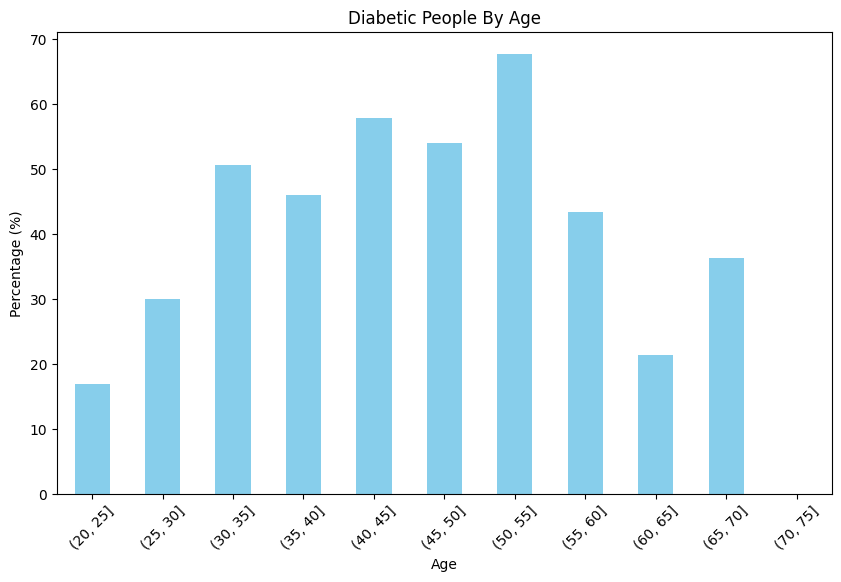

In [108]:
bins = range(20, 85, 5)  
df['AgeGroup'] = pd.cut(df['Age'], bins)

age_group_diabetes = df[df['Outcome'] == 1].groupby('AgeGroup').size()
age_group_total = df.groupby('AgeGroup').size()
percentage_diabetes = (age_group_diabetes / age_group_total) * 100

percentage_diabetes = percentage_diabetes.dropna()

percentage_diabetes.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Diabetic People By Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


# **Data Preprocessing**


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Outcome', 'AgeGroup'], axis=1)  
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Training**

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

# **Making Predictions**

In [111]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75
